In [32]:
from rmgpy.species import Species
from rmgpy.molecule.parser import *
from rmgpy.molecule.generator import *
from rmgpy.molecule.inchi import compose_aug_inchi, P_LAYER_PREFIX, P_LAYER_SEPARATOR, U_LAYER_PREFIX, U_LAYER_SEPARATOR
from rmgpy.molecule import Molecule
import rmgpy.molecule.resonance as res
from IPython.display import display, HTML, Image, display_html
import re
import itertools
from operator import itemgetter

In [2]:
spcA0 = Species().fromSMILES('CO[O]')  # correct structure
spcA1 = Species().fromSMILES('[CH3-]=[O+][O]')
spcB0 = Species().fromSMILES('[O]N=O')  # one of the correct structures
spcB1 = Species().fromAdjacencyList("""multiplicity 2
                                        1 O u0 p2 c0 {2,D}
                                        2 N u1 p0 c0 {1,D} {3,D}
                                        3 O u0 p2 c0 {2,D}""")
spcC0 = Species().fromSMILES('OS(=O)[O]')  # correct structure
spcC1 = Species().fromSMILES('O[S-](#[O+])[O]')
spcC2 = Species().fromSMILES('O=[S+2]([O-])[O-]')

In [13]:
def isIsomorphic_tst(self, other, generateRes=False):
    """
    Return ``True`` if the species is isomorphic to `other`, which can be
    either a :class:`Molecule` object or a :class:`Species` object.
    If generateRes is ``True`` and other is a :class:`Species` object,
    the resonance structures of other will be generated.
    """
    if isinstance(other, Molecule):
        print "other is Molecule"
        for molecule in self.molecule:
            if molecule.isIsomorphic(other):
                return True
    elif isinstance(other, Species):
        print "other is Species"
        if generateRes:
            print "generating res"
            print len(other.molecule)
            display(other)
            other.generateResonanceIsomers()
            print len(other.molecule)
            display(other)
        for molecule1 in self.molecule:
            for molecule2 in other.molecule:
                if molecule1.isIsomorphic(molecule2):
                    return True
    else:
        print('Unexpected value "{0!r}" for other parameter; should be a Molecule or Species object.'.format(other))
    return False

other is Species
generating res
1


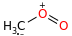

1


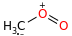

False

In [14]:
isIsomorphic_tst(spcA0, spcA1, generateRes=True)

1
5


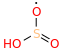

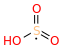

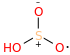

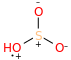

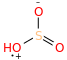

In [44]:
spcA0 = Species().fromSMILES('OS(=O)[O]')
spcA0.molecule[0].update()
print len(spcA0.molecule)
molList = res.generateResonanceStructures(spcA0.molecule[0])
print len(molList)
for mol in molList:
    display(mol)

1
5


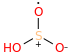

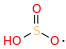

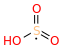

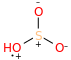

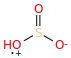

In [42]:
spcA0 = Species().fromSMILES('O[S-](#[O+])[O]')
spcA0.molecule[0].update()
print len(spcA0.molecule)
molList = res.generateResonanceStructures(spcA0.molecule[0])
print len(molList)
for mol in molList:
    display(mol)

1
2


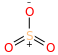

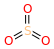

In [43]:
spcA0 = Species().fromSMILES('O=[S+2]([O-])[O-]')
spcA0.molecule[0].update()
print len(spcA0.molecule)
molList = res.generateResonanceStructures(spcA0.molecule[0])
print len(molList)
for mol in molList:
    display(mol)